In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import scipy.stats as st
from statsmodels.stats import weightstats as stests
from sklearn.linear_model import LinearRegression

from IPython.display import display, HTML

import urllib.request

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36')]
urllib.request.install_opener(opener)

url = "http://aulas.artificial.eng.br/Home/pgcc005/dados-vacinados-metod2-atividade.csv.gz"
urllib.request.urlretrieve (url, "dados-vacinados-metod2.csv.gz")

vacinadf = pd.read_csv("dados-vacinados-metod2.csv.gz",index_col=False, compression='gzip')

vacinadf['vacina_dataAplicacao']= pd.to_datetime(vacinadf['vacina_dataAplicacao'], format='%Y-%m-%d')

# 1. Quais são os tipos de dados (cf slides 12 e 13 da aula 4) disponíveis na base? (avalie cada campo, não tome como base os tipos do panda)

In [ ]:
display("Tipos de dados disponíveis na base")
display(vacinadf.dtypes)

'Tipos de dados disponíveis na base'

document_id                                              object
paciente_id                                              object
paciente_idade                                            int64
paciente_dataNascimento                                  object
paciente_enumSexoBiologico                               object
paciente_racaCor_codigo                                   int64
paciente_racaCor_valor                                   object
paciente_endereco_coIbgeMunicipio                       float64
paciente_endereco_coPais                                float64
paciente_endereco_nmMunicipio                            object
paciente_endereco_nmPais                                 object
paciente_endereco_uf                                     object
paciente_endereco_cep                                   float64
paciente_nacionalidade_enumNacionalidade                 object
estabelecimento_valor                                     int64
estabelecimento_razaoSocial             

document_id: Categórico Nominal

paciente_id: Categórico Nominal

paciente_idade: Numérico

paciente_dataNascimento: Numérico

paciente_enumSexoBiologico: Categórico Nominal

paciente_racaCor_codigo: Categórico Nominal

paciente_racaCor_valor: Categórico Nominal

paciente_endereco_coIbgeMunicipio: Categórico Nominal

paciente_endereco_coPais: Categórico Nominal

paciente_endereco_nmMunicipio: Categórico Nominal

paciente_endereco_nmPais: Categórico Nominal

paciente_endereco_uf: Categórico Nominal

paciente_endereco_cep: Categórico Nominal

paciente_nacionalidade_enumNacionalidade: Categórico Nominal

estabelecimento_valor: Categórico Nominal

estabelecimento_razaoSocial: Categórico Nominal

estalecimento_noFantasia: Categórico Nominal

estabelecimento_municipio_codigo: Categórico Nominal

estabelecimento_municipio_nome: Categórico Nominal

estabelecimento_uf: Categórico Nominal

vacina_grupoAtendimento_codigo: Categórico Nominal

vacina_grupoAtendimento_nome: Categórico Nominal

vacina_categoria_codigo: Categórico Nominal

vacina_categoria_nome: Categórico Nominal

vacina_lote: Categórico Nominal

vacina_fabricante_nome: Categórico Nominal

vacina_fabricante_referencia: Categórico Nominal

vacina_dataAplicacao: Numérico

vacina_descricao_dose: Categórico Nominal

vacina_codigo: Categórico Nominal

vacina_nome: Categórico Nominal

sistema_origem: Categórico Nominal

data_importacao_rnds: Numérico

# 2. Quais são as cidades dos estabelecimentos com dados disponíveis na base? Quais são as cidades dos pacientes com dados disponíveis na base? Compare e comente os resultados.

In [ ]:
display("Cidades dos estabelecimentos com dados disponíveis na base")
display(vacinadf.estabelecimento_municipio_nome.unique())

display("Cidades dos pacientes com dados disponíveis na base")
display(vacinadf.paciente_endereco_nmMunicipio.unique())

'Cidades dos estabelecimentos com dados disponíveis na base'

array(['FEIRA DE SANTANA', 'JUAZEIRO', 'SALVADOR', 'VITORIA DA CONQUISTA',
       'CAMACARI'], dtype=object)

'Cidades dos pacientes com dados disponíveis na base'

array(['FEIRA DE SANTANA', 'JUAZEIRO', 'SALVADOR', ..., 'DOIS VIZINHOS',
       'SAO LEOPOLDO', 'BETANIA'], dtype=object)

A quantidade de cidades dos pacientes é bastante superior à quantidade de cidades dos estabelecimentos. Isso ocorre porque nem todos os moradores e profissionais de saúde vacinados nasceram nas cidades dos estabelecimentos onde receberam a vacina.

# 3. Escolha uma cidade e escolha dois períodos de sete dias (não sobrepostos) dentro da faixa de tempo disponível na base. Calcule a tendência central (média, mediana e/ou moda, conforme possibilidade) e desvio padrão para idade. Que análise pode ser feita observando cada período e comparando os períodos?

In [ ]:
cidade = (vacinadf['estabelecimento_municipio_nome'] == 'JUAZEIRO')

primeira_semana = (vacinadf['vacina_dataAplicacao'] >= '2021-03-03') & (vacinadf['vacina_dataAplicacao'] < '2021-03-10')
segunda_semana = (vacinadf['vacina_dataAplicacao'] >= '2021-03-17') & (vacinadf['vacina_dataAplicacao'] < '2021-03-23')

display("Média das idades dos vacinados em Juazeiro de 03/03/2021 à 09/03/2021")
display(vacinadf[primeira_semana & cidade]['paciente_idade'].mean())

display("Desvio Padrão das idades dos vacinados em Juazeiro de 03/03/2021 à 09/03/2021")
display(vacinadf[primeira_semana & cidade]['paciente_idade'].std())

display("Mediana das idades dos vacinados em Juazeiro de 03/03/2021 à 09/03/2021")
display(vacinadf[primeira_semana & cidade]['paciente_idade'].median())

display("Moda das idades dos vacinados em Juazeiro de 03/03/2021 à 09/03/2021")
display(vacinadf[primeira_semana & cidade]['paciente_idade'].mode()[0])

display("Média das idades dos vacinados em Juazeiro de 17/03/2021 à 23/03/2021")
display(vacinadf[segunda_semana & cidade]['paciente_idade'].mean())

display("Desvio Padrão das idades dos vacinados em Juazeiro de 17/03/2021 à 23/03/2021")
display(vacinadf[segunda_semana & cidade]['paciente_idade'].std())

display("Mediana das idades dos vacinados em Juazeiro de 17/03/2021 à 23/03/2021")
display(vacinadf[segunda_semana & cidade]['paciente_idade'].median())

display("Moda das idades dos vacinados em Juazeiro de 17/03/2021 à 23/03/2021")
display(vacinadf[segunda_semana & cidade]['paciente_idade'].mode()[0])

'Média das idades dos vacinados em Juazeiro de 03/03/2021 à 09/03/2021'

75.39640077821012

'Desvio Padrão das idades dos vacinados em Juazeiro de 03/03/2021 à 09/03/2021'

15.970470520468012

'Mediana das idades dos vacinados em Juazeiro de 03/03/2021 à 09/03/2021'

80.0

'Moda das idades dos vacinados em Juazeiro de 03/03/2021 à 09/03/2021'

80

'Média das idades dos vacinados em Juazeiro de 17/03/2021 à 23/03/2021'

67.52301886792453

'Desvio Padrão das idades dos vacinados em Juazeiro de 17/03/2021 à 23/03/2021'

15.304723219094424

'Mediana das idades dos vacinados em Juazeiro de 17/03/2021 à 23/03/2021'

72.0

'Moda das idades dos vacinados em Juazeiro de 17/03/2021 à 23/03/2021'

72

No primeiro período, de 03/03/2021 à 09/03/2021, foram vacinadas em Juazeiro pessoas com idade média um pouco maior que 75 anos, 50% dos vacinados mais jovens tinham até 80 anos, e a maioria dos vacinados tinha 80 anos.

No segundo período, 17/03/2021 à 23/03/2021, foram vacinadas em Juazeiro pessoas com idade média um pouco maior que 67 anos, 50% dos vacinados mais jovens tinham até 72 anos, e a maioria dos vacinados tinha 72 anos.

No segundo período de tempo, pode ser percebida uma queda nos valores de tendência central, essa queda pode ser explicada pelo fato de o calendário de vacinação seguir uma ordem descrescente de idades.

# 4. Escolha uma cidade, identifique os 15 grupos de atendimento com maior número de vacinados. Escolha dois grupos de atendimento dentre estes. Para cada grupo, faça box-plot das idades em cada grupo divididos conforme raça/cor. O que você observa? Comente.

In [ ]:
cidade = (vacinadf['estabelecimento_municipio_nome'] == 'CAMACARI')

lista_grupos = vacinadf[cidade].groupby('vacina_grupoAtendimento_nome')
lista_grupos = lista_grupos['vacina_grupoAtendimento_nome'].count().reset_index(
    name='vacina_grupoAtendimento_quantidade'
    ).sort_values('vacina_grupoAtendimento_quantidade', ascending=False)
display('Os 15 grupos de atendimento com maior número de vacinados')
display(lista_grupos.head(15))

'Os 15 grupos de atendimento com maior número de vacinados'

,vacina_grupoAtendimento_nome,vacina_grupoAtendimento_quantidade
20,Pessoas de 80 anos ou mais,2132
19,Pessoas de 75 a 79 anos,1316
13,Outros,802
18,Pessoas de 70 a 74 anos,198
24,Técnico de Enfermagem,105
4,Enfermeiro(a),51
22,Recepcionista,32
23,Segurança,29
9,Médico,24
3,Cozinheiro e Auxiliares,22


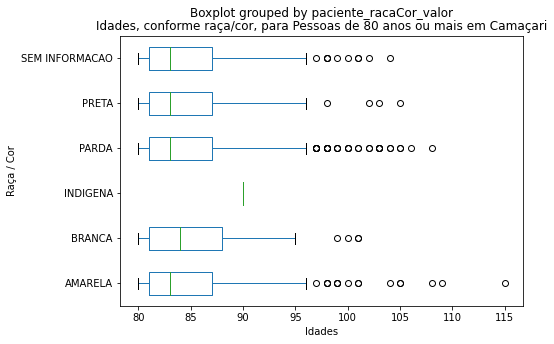

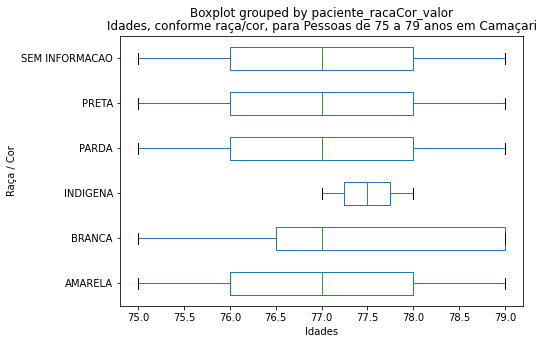

In [ ]:
cidade = (vacinadf['estabelecimento_municipio_nome'] == 'CAMACARI')

grupo1 = (vacinadf['vacina_grupoAtendimento_nome'] == 'Pessoas de 80 anos ou mais')
grupo2 = (vacinadf['vacina_grupoAtendimento_nome'] == 'Pessoas de 75 a 79 anos')

cond_grupo1 = (vacinadf['paciente_idade'] >= 80)
cond_grupo2 = (vacinadf['paciente_idade'] >= 75) & (vacinadf['paciente_idade'] < 80)

idades1 = vacinadf[cidade & grupo1 & cond_grupo1].boxplot(
    column=['paciente_idade'],
    by='paciente_racaCor_valor',
    vert=False,
    figsize=(7,5))
idades1.set_ylabel('Raça / Cor')
idades1.set_xlabel('Idades')
idades1.set_title('Idades, conforme raça/cor, para Pessoas de 80 anos ou mais em Camaçari');
idades1.grid(False)

idades2 = vacinadf[cidade & grupo2 & cond_grupo2].boxplot(
    column=['paciente_idade'],
    by='paciente_racaCor_valor',
    vert=False,
    figsize=(7,5))
idades2.set_ylabel('Raça / Cor')
idades2.set_xlabel('Idades')
idades2.set_title('Idades, conforme raça/cor, para Pessoas de 75 a 79 anos em Camaçari');
idades2.grid(False)

Para o grupo de pessoas de 80 anos ou mais em Camaçari, pode ser notado que para os vacinados de 'raça/cor' indígena o boxplot somente aponta a mediana e não possui bigodes, indicando que há apenas 1 vacinado de 'raça/cor' indígena pertencente a esse grupo. Nos demais casos, pouco mais de 50% dos vacinados tinham menos de 85 anos. Para todas as 'raça/cor', exceto a indígena, as idades formaram uma distribuição assimétrica positiva.

Para pessoas entre 75 e 79 anos ou mais em Camaçari, pode ser notado que 50% dos vacinados de 'raça/cor' indígena possuíam menos de 77 anos e meio. Nos demais casos, 50% dos vacinados tinham menos de 77 anos. Para todas as 'raça/cor', exceto a branca, as idades formaram uma distribuição normal.

Nos dois grupos selecionados, precisou ser adicionada uma condição para eliminar os valores de idade não pertencentes aos grupos.

# 5. Escolha duas categorias de vacinados e uma cidade, calcule o total de vacinados (1a dose) de cada categoria a cada semana (escolha um dia da semana de referência). Faça um gráfico de barra dos valores semanais de cada categoria. O que você observa? Comente.

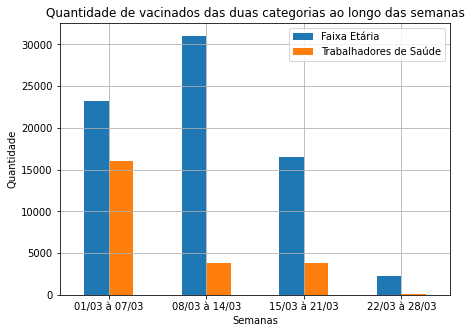

In [ ]:
cidade = (vacinadf['estabelecimento_municipio_nome'] == 'CAMACARI')

categoria1 = (vacinadf['vacina_categoria_nome'] == 'Faixa Etária')
categoria2 = (vacinadf['vacina_categoria_nome'] == 'Trabalhadores de Saúde')

semana1 = (vacinadf['vacina_dataAplicacao'] >= '2021-03-01') & (vacinadf['vacina_dataAplicacao'] < '2021-03-08')
semana2 = (vacinadf['vacina_dataAplicacao'] >= '2021-03-08') & (vacinadf['vacina_dataAplicacao'] < '2021-03-15')
semana3 = (vacinadf['vacina_dataAplicacao'] >= '2021-03-15') & (vacinadf['vacina_dataAplicacao'] < '2021-03-22')
semana4 = (vacinadf['vacina_dataAplicacao'] >= '2021-03-22') & (vacinadf['vacina_dataAplicacao'] < '2021-03-29')

primeira_dose = (vacinadf['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose')

fe_s1 = vacinadf[cidade & categoria1 & primeira_dose & semana1].size
fe_s2 = vacinadf[cidade & categoria1 & primeira_dose & semana2].size
fe_s3 = vacinadf[cidade & categoria1 & primeira_dose & semana3].size
fe_s4 = vacinadf[cidade & categoria1 & primeira_dose & semana4].size

ts_s1 = vacinadf[cidade & categoria2 & primeira_dose & semana1].size
ts_s2 = vacinadf[cidade & categoria2 & primeira_dose & semana2].size
ts_s3 = vacinadf[cidade & categoria2 & primeira_dose & semana3].size
ts_s4 = vacinadf[cidade & categoria2 & primeira_dose & semana4].size

faixa_etaria = [fe_s1, fe_s2, fe_s3, fe_s4]
trabalhadores_de_saude = [ts_s1, ts_s2, ts_s3, ts_s4]

labels = ['01/03 à 07/03', '08/03 à 14/03', '15/03 à 21/03', '22/03 à 28/03']
idades = pd.DataFrame({'Faixa Etária': faixa_etaria,
                   'Trabalhadores de Saúde': trabalhadores_de_saude}, index=labels)

fig, ax = plt.subplots(figsize=(7,5))
idades.plot.bar(ax=ax, rot=0)
ax.set_xlabel('Semanas')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de vacinados das duas categorias ao longo das semanas');
ax.grid()

Ao longos das semanas, na cidade de Camaçari, foram vacinadas (1a dose) mais pessoas da categoria 'Faixa etária' do que da categoria 'Trabalhadores de saúde'. Como, de acordo com o calendário de vacinação, a vacinação de idosos e de profissionais de saúde ocorreu na primeira fase do plano de vacinação, pode ser concluído que a população de idosos no município de Camaçari é superior à população de trabalhores da saúde.

# 6. Escolha uma cidade e um período de 15 dias, faça histogramas sobrepostos da idade dos vacinados (1a dose) por sexo biológico. O que você observa? Comente.

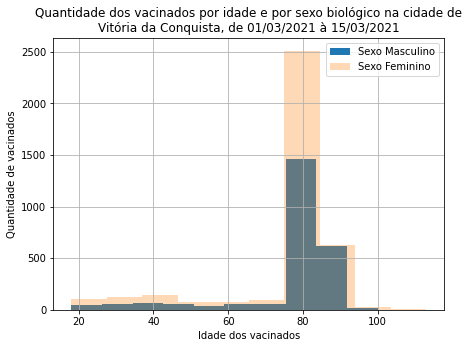

In [ ]:
cidade = (vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA')

masculino = (vacinadf['paciente_enumSexoBiologico'] == 'M')
feminino = (vacinadf['paciente_enumSexoBiologico'] == 'F')

quinzena = (vacinadf['vacina_dataAplicacao'] >= '2021-03-01') & (vacinadf['vacina_dataAplicacao'] < '2021-03-16')

primeira_dose = (vacinadf['vacina_descricao_dose'] ==  '\xa0\xa0\xa0\xa01ª\xa0Dose')

hist_m = vacinadf[cidade & quinzena & masculino & primeira_dose]['paciente_idade']
hist_f = vacinadf[cidade & quinzena & feminino & primeira_dose]['paciente_idade']

plt.figure(figsize=(7,5))
plt.hist(hist_m, bins = 10, alpha=1.0, label='Sexo Masculino')
plt.hist(hist_f, bins = 10, alpha=0.3, label='Sexo Feminino')
plt.legend(loc='best')
plt.title('Quantidade dos vacinados por idade e por sexo biológico na cidade de\nVitória da Conquista, de 01/03/2021 à 15/03/2021')
plt.ylabel('Quantidade de vacinados')
plt.xlabel('Idade dos vacinados')
plt.grid()
plt.show()

Através do histograma acima, pode ser percebido a quantidade de mulheres vacinadas foi superior à quantidade de homens vacinados em Vitória da Conquista, na quinzena de 01/03/2021 à 15/03/2021.

Nas faixas de 20 à 70 anos e acima de 90 anos o número não é tão distante, contudo, na faixa dos 80 anos, foram vacinadas cerca de 1000 mulheres a mais que homens.

As distribuições de homens e de mulheres vacinados apresentam assimetria negativa, a maior concentração de vacinados se encontra nos maiores valores de idade.

# 7 Escolha uma categoria de vacinados e duas cidades, considere os vacinados em 1ª dose como a população de interesse. Calcule a média de idade desta população. Faça uma amostragem aleatória de 10% de indivíduos desta população, calcule a média desta amostra. Compare e comente sobre os valores destas médias.

In [ ]:
cidade1 = (vacinadf['estabelecimento_municipio_nome'] == 'JUAZEIRO')
cidade2 = (vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA')

categoria = (vacinadf['vacina_categoria_nome'] == 'Faixa Etária')

primeira_dose = (vacinadf['vacina_descricao_dose'] ==  '\xa0\xa0\xa0\xa01ª\xa0Dose')

populacao = vacinadf[cidade1 | cidade2 & categoria & primeira_dose]['paciente_idade']
amostra10 = populacao.sample(frac = 0.1, replace=False)

display('Média de idade dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista')
display(populacao.mean())

display('Média de idade de uma amostragem aleatória de 10% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista')
display(amostra10.mean())

'Média de idade dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista'

75.80826230143356

'Média de idade de uma amostragem aleatória de 10% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista'

75.71767554479419

A média amostral de 10% da população apresentou valor pouco superior em relação a média populacional, as médias apresentaram valores bem próximos.

#8. Considere a população do item anterior. Faça uma amostragem aleatória de 10% de indivíduos e outra amostragem aleatória de 1% de indivíduos desta população. Calcule a média e o erro padrão da cada amostra. O que você observa? Calcule o intervalo de confiança para 90% para cada amostra. Compare com a média real da população. Comente.

In [ ]:
cidade1 = (vacinadf['estabelecimento_municipio_nome'] == 'JUAZEIRO')
cidade2 = (vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA')

categoria = (vacinadf['vacina_categoria_nome'] == 'Faixa Etária')

primeira_dose = (vacinadf['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose')

populacao = vacinadf[cidade1 | cidade2 & categoria & primeira_dose]['paciente_idade']
amostra10 = populacao.sample(frac = 0.1, replace=False)
amostra1 = populacao.sample(frac = 0.01, replace=False)

display('Média de idade dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista')
display(populacao.mean())

display('Média de idade de uma amostragem aleatória de 10% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista')
media10 = amostra10.mean()
display(media10)

display('Erro padrão de idade de uma amostragem aleatória de 10% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista')
erro_padrao10 = amostra10.sem()
display(erro_padrao10)

display('Média de idade de uma amostragem aleatória de 1% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista')
media1 = amostra1.mean()
display(media1)

display('Erro padrão de idade de uma amostragem aleatória de 1% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista')
erro_padrao1 = amostra1.sem()
display(erro_padrao1)

intervalo10 = st.t.interval(0.90, amostra10.size - 1, loc=media10, scale=erro_padrao10)
intervalo1 = st.t.interval(0.90, amostra1.size - 1, loc=media1, scale=erro_padrao1)

display('Intervalo de confiança de 90% para a média das idades da amostragem de 10% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista')
display(intervalo10)

display('Intervalo de confiança de 90% para a média das idades da amostragem de 1% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista')
display(intervalo1)

'Média de idade dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista'

75.80826230143356

'Média de idade de uma amostragem aleatória de 10% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista'

75.63970944309928

'Erro padrão de idade de uma amostragem aleatória de 10% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista'

0.23118925804150656

'Média de idade de uma amostragem aleatória de 1% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista'

73.13592233009709

'Erro padrão de idade de uma amostragem aleatória de 1% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista'

0.8517396521892523

'Intervalo de confiança de 90% para a média das idades da amostragem de 10% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista'

(75.25926619856078, 76.02015268763778)

'Intervalo de confiança de 90% para a média das idades da amostragem de 1% dos vacinados em 1ª dose nas cidades de Juazeiro e Vitória da Conquista'

(71.72857539461857, 74.5432692655756)

Em relação às médias das amostras, os valores se aproximaram da média populacional. Além disso, pode ser percebido que a amostra de 1% teve valor do erro padrão superior ao da amostra de 10%, isso acontece porque quanto maior a quantidade de indivíduos em uma amostra, maior a probalidade dela representar a população.

Considerando uma amostragem de 10% da população, com 90% de confiança, pode ser dito que a média populacional das idades está entre 75.24099974494007 e 76.01517458920037.

Considerando uma amostragem de 1% da população, com 90% de confiança, pode ser dito que a média populacional das idades está entre 75.5451590493435 e 77.9305691059963.

Em ambas amostragens, o valor real da média populacional pertence ao intervalo de confiança obtido. Pode ser afirmado que as amostragens foram representativas em relação a população.

# 9. Escolha três categorias de vacinados e uma cidade, faça a tabela de contingência de vacinação em 1a dose entre estas categorias e o atributo raça/cor. O que você observa? Comente.

In [ ]:
cidade = (vacinadf['estabelecimento_municipio_nome'] == 'JUAZEIRO')

categoria1 = (vacinadf['vacina_categoria_nome'] == 'Faixa Etária')
categoria2 = (vacinadf['vacina_categoria_nome'] == 'Trabalhadores de Saúde')
categoria3 = (vacinadf['vacina_categoria_nome'] == 'Comorbidades')
categorias = (categoria1 | categoria2 | categoria3)

primeira_dose = (vacinadf['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose')

dados_tabela = vacinadf[categorias & cidade & primeira_dose]

pd.crosstab(dados_tabela['vacina_categoria_nome'], dados_tabela['paciente_racaCor_valor'], margins=True, margins_name = 'Total')

paciente_racaCor_valor,AMARELA,BRANCA,INDIGENA,PARDA,PRETA,SEM INFORMACAO,Total
vacina_categoria_nome,,,,,,,
Comorbidades,45,15,1,43,6,22,132
Faixa Etária,1871,864,12,1672,399,1249,6067
Trabalhadores de Saúde,191,111,0,197,21,191,711
Total,2107,990,13,1912,426,1462,6910


Através da tabela de contingência, pode ser observado que na cidade de Juazeiro, a grande maioria dos vacinados pertence a categoria 'Faixa Etária', dentro dessa categoria, pessoas de raça/cor amarela foram maioria. Dentre os 'Trabalhadores de Saúde', pode ser visto que não haviam indígenas, e apenas 21 eram de raça/cor preta. Nas três categorias consideradas, o menor número de vacinados foram as pessoas de raça/cor indígena.

# 10. Escolha uma categoria de vacinados e duas cidades, obtenha o total diário de vacinados em 1a dose desta categoria para cada cidade. Faça um gráfico de dispersão de total de vacinados em uma cidade vs outra cidade. Calcule o coeficiente de correlação de Pearson e obtenha o modelo de regressão linear. Comente sobre o gráfico e os resultados.

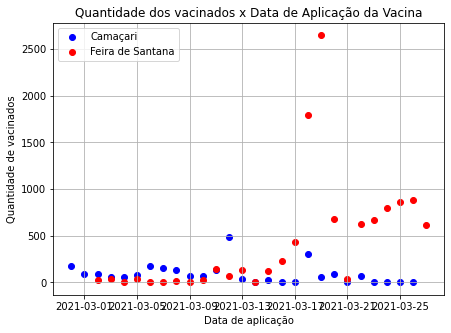

'Coeficiente de correlação de Pearson entre os vacinados diariamente em Camaçari e Feira de Santana'

,CAMACARI,FEIRA DE SANTANA
CAMACARI,1.000000,-0.317508
FEIRA DE SANTANA,-0.317508,1.000000



a= [[-1.83699116]] b= [565.15040408]


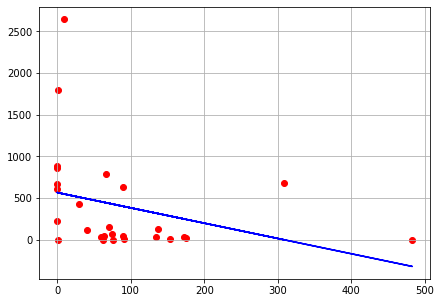

In [ ]:
categoria = (vacinadf['vacina_categoria_nome'] == 'Faixa Etária')

cidade1 = (vacinadf['estabelecimento_municipio_nome'] == 'CAMACARI')
cidade2 = (vacinadf['estabelecimento_municipio_nome'] == 'FEIRA DE SANTANA')

primeira_dose = (vacinadf['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose')

diariamente = [pd.Grouper(key='vacina_dataAplicacao', freq='D')]

vacinados_diariamente_cidade1 = vacinadf[cidade1 & categoria & primeira_dose].groupby(diariamente)
vacinados_diariamente_cidade1 = vacinados_diariamente_cidade1['vacina_dataAplicacao'].count().reset_index(
    name='vacina_dataAplicacao_quantidade'
    ).sort_values('vacina_dataAplicacao', ascending=True)

vacinados_diariamente_cidade2 = vacinadf[cidade2 & categoria & primeira_dose].groupby(diariamente)
vacinados_diariamente_cidade2 = vacinados_diariamente_cidade2['vacina_dataAplicacao'].count().reset_index(
    name='vacina_dataAplicacao_quantidade'
    ).sort_values('vacina_dataAplicacao', ascending=True)

plt.figure(figsize=(7,5))
plt.scatter(x=vacinados_diariamente_cidade1['vacina_dataAplicacao'],
            y=vacinados_diariamente_cidade1['vacina_dataAplicacao_quantidade'],
            c='b',
            label='Camaçari')
plt.scatter(x=vacinados_diariamente_cidade2['vacina_dataAplicacao'],
            y=vacinados_diariamente_cidade2['vacina_dataAplicacao_quantidade'],
            c='r', label='Feira de Santana')
plt.legend(loc='best')
plt.title('Quantidade dos vacinados x Data de Aplicação da Vacina')
plt.ylabel('Quantidade de vacinados')
plt.xlabel('Data de aplicação')
plt.grid()
plt.show()

vacinados_diariamente = pd.DataFrame({
    'CAMACARI': vacinados_diariamente_cidade1['vacina_dataAplicacao_quantidade'],
    'FEIRA DE SANTANA': vacinados_diariamente_cidade2['vacina_dataAplicacao_quantidade']
})
vacinados_diariamente = vacinados_diariamente.fillna(0)

print('')
display('Coeficiente de correlação de Pearson entre os vacinados diariamente em Camaçari e Feira de Santana')
display(vacinados_diariamente.corr(method='pearson'))

X = vacinados_diariamente['CAMACARI'].values.reshape(-1, 1)
Y = vacinados_diariamente['FEIRA DE SANTANA'].values.reshape(-1, 1)

reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)

print('')
print('a=', reg.coef_, 'b=', reg.intercept_)

plt.figure(figsize=(7,5))
plt.scatter(x=X, y=Y, c='r')
plt.plot(X, Y_pred, c='b')
plt.grid()
plt.show()

O coeficiente de correlação Pearson igual a -0.317508 indica uma correlação negativa fraca entre a quantidade de vacinados diariamente em Camaçari e em Feira de Santana.

Baseado na regressão linear, a fraca correlação pode ser confirmada, a reta de regressão obtida y = -1.83699116x + 565.15040408, uma reta decrescente e com inclinação relativamente pequena.

Pode ser concluído que o a quantidade de vacinados diariamente em Camaçari não tem influência na quantidade de vacinados diariamente em Feira de Santana.

#11. Selecione uma semana específica e uma categoria (Faixa Etária ou Trabalhadores de Saúde), escolha duas cidades e obtenha as idades dos vacinados em 1a dose em cada. Verifique a hipótese da média de idades entre as cidades serem diferentes. Explique seus passos e conclusão.

In [ ]:
semana = (vacinadf['vacina_dataAplicacao'] >= '2021-03-01') & (vacinadf['vacina_dataAplicacao'] < '2021-03-08')

categoria = (vacinadf['vacina_categoria_nome'] == 'Faixa Etária')

cidade1 = (vacinadf['estabelecimento_municipio_nome'] == 'JUAZEIRO')
cidade2 = (vacinadf['estabelecimento_municipio_nome'] == 'VITORIA DA CONQUISTA')

primeira_dose = (vacinadf['vacina_descricao_dose'] == '\xa0\xa0\xa0\xa01ª\xa0Dose')

idades_cidade1 = vacinadf[semana & cidade1 & categoria & primeira_dose]['paciente_idade']
idades_cidade2 = vacinadf[semana & cidade2 & categoria & primeira_dose]['paciente_idade']

display('Quantidade dos vacinados da categoria \'Faixa Etária\' em Juazeiro, na semana de 01/03/2021 à 07/03/2021')
display(idades_cidade1.size)

display('Média de idade dos vacinados da categoria \'Faixa Etária\' em Juazeiro, na semana de 01/03/2021 à 07/03/2021')
display(idades_cidade1.mean())

display('Quantidade dos vacinados da categoria \'Faixa Etária\' em Vitória da Conquista, na semana de 01/03/2021 à 07/03/2021')
display(idades_cidade2.size)

display('Média de idade dos vacinados da categoria \'Faixa Etária\' em Vitória da Conquista, na semana de 01/03/2021 à 07/03/2021')
display(idades_cidade2.mean())

z_test, p_val = stests.ztest(x1=idades_cidade1, x2=idades_cidade2, value=0, alternative='two-sided')

display('z_test = '+ str(float(z_test)))
display('p_val = '+ str(float(p_val)))

display('A média de idade dos vacinados da categoria \'Faixa Etária\' em Juazeiro e Vitória da Conquista, na semana')
display('de 01/03/2021 à 07/03/2021, são iguais (diferença zero)?')
if p_val < 0.1:
  display('rejeite a hipótese nula')
else:
  display('rejeite a hipótese alternativa')

"Quantidade dos vacinados da categoria 'Faixa Etária' em Juazeiro, na semana de 01/03/2021 à 07/03/2021"

1234

"Média de idade dos vacinados da categoria 'Faixa Etária' em Juazeiro, na semana de 01/03/2021 à 07/03/2021"

80.65559157212317

"Quantidade dos vacinados da categoria 'Faixa Etária' em Vitória da Conquista, na semana de 01/03/2021 à 07/03/2021"

3142

"Média de idade dos vacinados da categoria 'Faixa Etária' em Vitória da Conquista, na semana de 01/03/2021 à 07/03/2021"

82.58402291534055

'z_test = -15.06747481975855'

'p_val = 2.6505150702799182e-51'

"A média de idade dos vacinados da categoria 'Faixa Etária' em Juazeiro e Vitória da Conquista, na semana"

'de 01/03/2021 à 07/03/2021, são iguais (diferença zero)?'

'rejeite a hipótese nula'

Hipótese nula: A média de idade dos vacinados da categoria 'Faixa Etária' em Juazeiro e Vitória da Conquista, na semana de 01/03/2021 à 07/03/2021, são iguais.

Hipótese alternativa: A média de idade dos vacinados da categoria 'Faixa Etária' em Juazeiro e Vitória da Conquista, na semana de 01/03/2021 à 07/03/2021, são diferentes

Baseado nessas hipóteses e considerando as médias populacionais, foi adotado o teste bilateral. Foi escolhido 0,1 (10%) como nível de signifcância.

Utilização do teste Z como estatística de teste, os dados da população foram considerados para a situação.

Depois de aplicar o teste de hipótese, pode ser verificado um p_val menor que o nível de significância, implicando na decisão de rejeição da Hipótese nula, das médias serem iguais.

Consequentemente, a decisão é a de aceitar a Hipótese alternativa, de que as médias são diferentes.